In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/UKM/Data Science & Analytics/Machine Learning/assignment4')

In [3]:
Pollutions = pd.read_excel('Pollutions.xlsx')

In [4]:
Pollutions.head()

,PRECReal,JANTReal,JULTReal,OVR65Real,POPNReal,EDUCReal,HOUSReal,DENSReal,NONWReal,WWDRKReal,POORReal,HCReal,NOXReal,SO@Real,HUMIDReal,MORTReal
0,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,921.870
1,35,23,72,11.1,3.14,11.0,78.8,4281,3.5,50.7,14.4,8,10,39,57,997.875
2,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,962.354
3,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,982.291
4,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1071.289


In [5]:
Pollutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRECReal   60 non-null     int64  
 1   JANTReal   60 non-null     int64  
 2   JULTReal   60 non-null     int64  
 3   OVR65Real  60 non-null     float64
 4   POPNReal   60 non-null     float64
 5   EDUCReal   60 non-null     float64
 6   HOUSReal   60 non-null     float64
 7   DENSReal   60 non-null     int64  
 8   NONWReal   60 non-null     float64
 9   WWDRKReal  60 non-null     float64
 10  POORReal   60 non-null     float64
 11  HCReal     60 non-null     int64  
 12  NOXReal    60 non-null     int64  
 13  SO@Real    60 non-null     int64  
 14  HUMIDReal  60 non-null     int64  
 15  MORTReal   60 non-null     float64
dtypes: float64(8), int64(8)
memory usage: 7.6 KB


In [6]:
Pollutions.shape

(60, 16)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Pollutions)
x_scaled = scaler.transform(Pollutions)

# KMeans clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

C:\Users\ash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


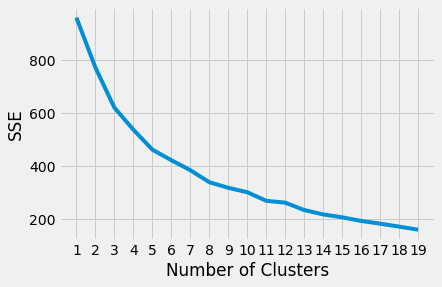

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 6, random_state = 42).fit(x_scaled)
kmeans.inertia_

423.0264663004756

# KMedoids clustering

In [14]:
from sklearn_extra.cluster import KMedoids

In [15]:
# A list holds the SSE values for each k
sse1 = []
for k in range(1, 20):
    kmedoids = KMedoids(n_clusters=k, random_state = 42)
    kmedoids.fit(x_scaled)
    sse1.append(kmedoids.inertia_)

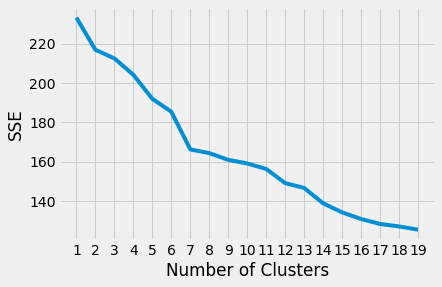

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse1)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
kmedoids = KMedoids(n_clusters=7, random_state=42).fit(x_scaled)
kmedoids.inertia_

166.2704531253556

# PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()
X_reduced = pca.fit_transform(x_scaled)

In [20]:
## Amount of variance explained by adding each consecutive principal component:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([30.5, 47.8, 62.1, 70.5, 78.1, 84.9, 89. , 92. , 94.5, 96. , 97.2,
       98.2, 98.9, 99.5, 99.8, 99.8])

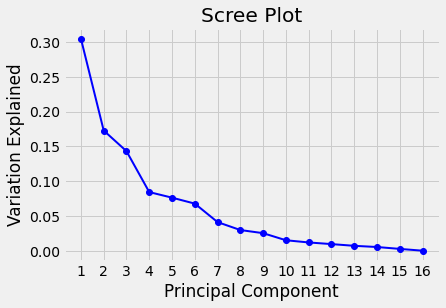

In [21]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xticks(np.arange(min(PC_values), max(PC_values)+1, 1.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variation Explained')
plt.show()

In [22]:
#the amount variance explained up to the PC of number 9
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[7]

92.13000000000001

In [53]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x_scaled)

# cluster the principal components using KMeans 

In [54]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(principalComponents)
    sse.append(kmeans.inertia_)

C:\Users\ash\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


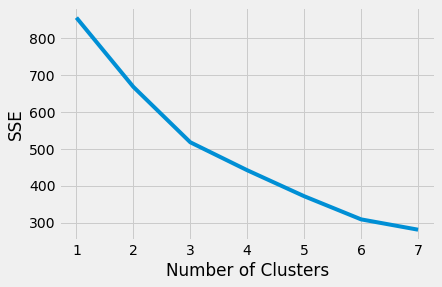

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 6, n_init = 20, random_state = 42).fit(principalComponents)
kmeans.inertia_

307.9636063880848

# cluster the principal components using KMedois

In [50]:
# A list holds the SSE values for each k
sse2 = []
for k in range(1, 8):
    kmedoids = KMedoids(n_clusters=k, random_state = 42)
    kmedoids.fit(principalComponents)
    sse2.append(kmedoids.inertia_)

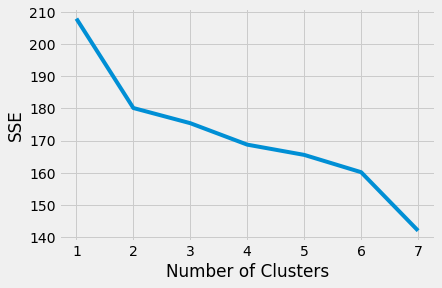

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse2)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
kmedoids = KMedoids(n_clusters=7, random_state=42).fit(principalComponents)
kmedoids.inertia_

141.8883135259727